# $$\text{Inicialización de pesos sinápticos con valores}$$
# $$\text{aleatorios, xavier y kaiming he}$$

In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from utils import get_images

In [13]:
# MNIST path
mnist_path = 'data/mnist_raw/'
x_train_num, y_train_num, x_test_num, y_test_num = get_images(mnist_path)

x_train = x_train_num[:50000].reshape(50000, -1).astype(np.float32)
y_train = y_train_num[:50000].reshape(50000, 1)

x_val = x_train_num[50000:].reshape(10000, -1).astype(np.float64)
y_val = y_train_num[50000:].reshape(10000, 1)

x_test = x_test_num.copy().reshape(10000, -1).astype(np.float64)
y_test = y_test_num.copy().reshape(10000, 1)


def normalise(x_mean, x_std, x_data):
    return (x_data-x_mean)/x_std

# x_t = x_train[:128]
x_t = normalise(x_train[:128].mean(),x_train[:128].std(), x_train[:128])
x_t.min(), x_t.max(), x_t.mean(), x_t.std()

(-0.4187288, 2.8666344, -2.0223004e-08, 1.0)

In [3]:
#normal random
def init_random(neurons):
    weights = {}
    for i in range(len(neurons)-1):
        weights['L' + str(i+1)] = np.random.randn(neurons[i+1], neurons[i])*0.001
    
    return weights

#xavier
def init_xavier(neurons):
    weights = {}
    for i in range(len(neurons)-1):
        weights['L' + str(i+1)] = np.random.randn(neurons[i+1], neurons[i])/np.sqrt(neurons[i])

    return weights

#kaiming he
def init_kaiming(neurons):
    weights = {}
    for i in range(len(neurons)-1):
        weights['L' + str(i+1)] = np.random.randn(neurons[i+1],neurons[i])/np.sqrt(neurons[i]/2)
    
    return weights

#### Definiendo capas

In [5]:
neurons = [500] * 10
neurons[0] = 784
neurons[-1] = 10

print(neurons)

[784, 500, 500, 500, 500, 500, 500, 500, 500, 10]


#### Pruebas con Random Init

In [14]:
weights = init_random(neurons)

acts = {}
z = x_t.T
for (k, v) in weights.items():
    z = v @ z
#     z = np.maximum(0, z)
    acts[k] = z

print(acts.keys())

dict_keys(['L1', 'L2', 'L3', 'L4', 'L5', 'L6', 'L7', 'L8', 'L9'])


La activación para la capa L1 tiene una media de -0.0003883 y una std de 0.02813
La activación para la capa L2 tiene una media de -1.294e-05 y una std de 0.0006271
La activación para la capa L3 tiene una media de 4.686e-07 y una std de 1.388e-05
La activación para la capa L4 tiene una media de 3.17e-09 y una std de 3.098e-07
La activación para la capa L5 tiene una media de -3.085e-11 y una std de 6.937e-09
La activación para la capa L6 tiene una media de -5.198e-12 y una std de 1.543e-10
La activación para la capa L7 tiene una media de 8.795e-14 y una std de 3.437e-12
La activación para la capa L8 tiene una media de 1.492e-15 y una std de 7.576e-14
La activación para la capa L9 tiene una media de -3.093e-16 y una std de 1.518e-15


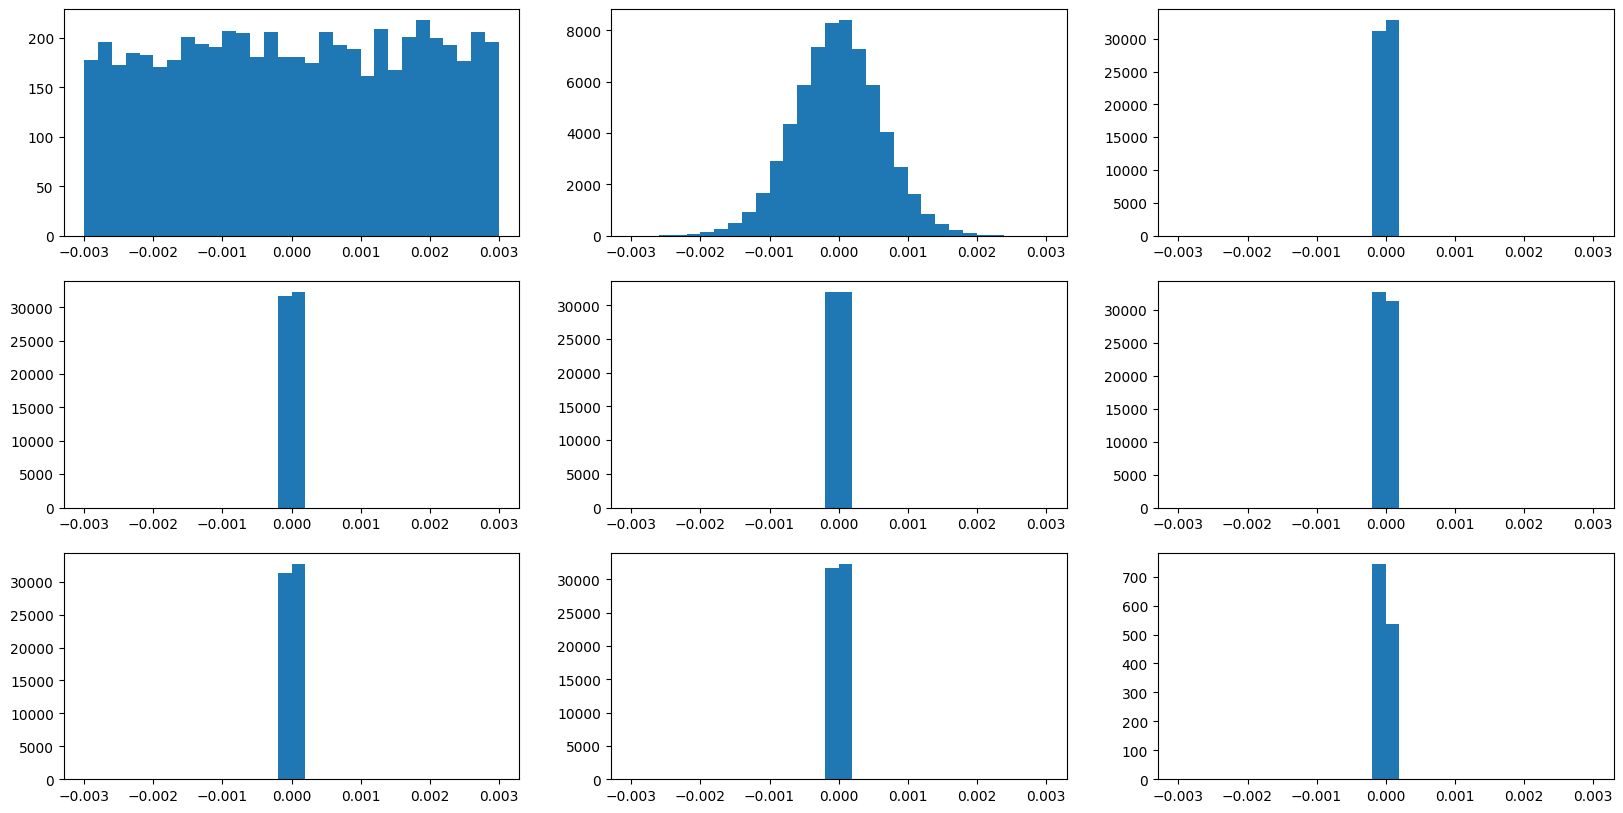

In [15]:
plt.figure(figsize=(20,10))

for i, (k, v) in enumerate(acts.items()):
    print(f'La activación para la capa {k} \
tiene una media de {v.ravel().mean():.4} y una std de {v.ravel().std():.4}')

for i, (k, v) in enumerate(acts.items(), 1):
    plt.subplot(3, 3, i)
    plt.hist(v.ravel(), bins=30, range=[-.003, .003])

plt.show()

#### Pruebas con xavier

La activación para la capa L1 tiene una media de -0.01959 y una std de 0.9954
La activación para la capa L2 tiene una media de -0.01345 y una std de 0.9982
La activación para la capa L3 tiene una media de 0.01632 y una std de 1.012
La activación para la capa L4 tiene una media de -0.01683 y una std de 1.007
La activación para la capa L5 tiene una media de -0.0157 y una std de 1.015
La activación para la capa L6 tiene una media de 0.03532 y una std de 1.004
La activación para la capa L7 tiene una media de 0.02891 y una std de 0.9925
La activación para la capa L8 tiene una media de -0.04999 y una std de 0.9877
La activación para la capa L9 tiene una media de 0.1385 y una std de 1.055


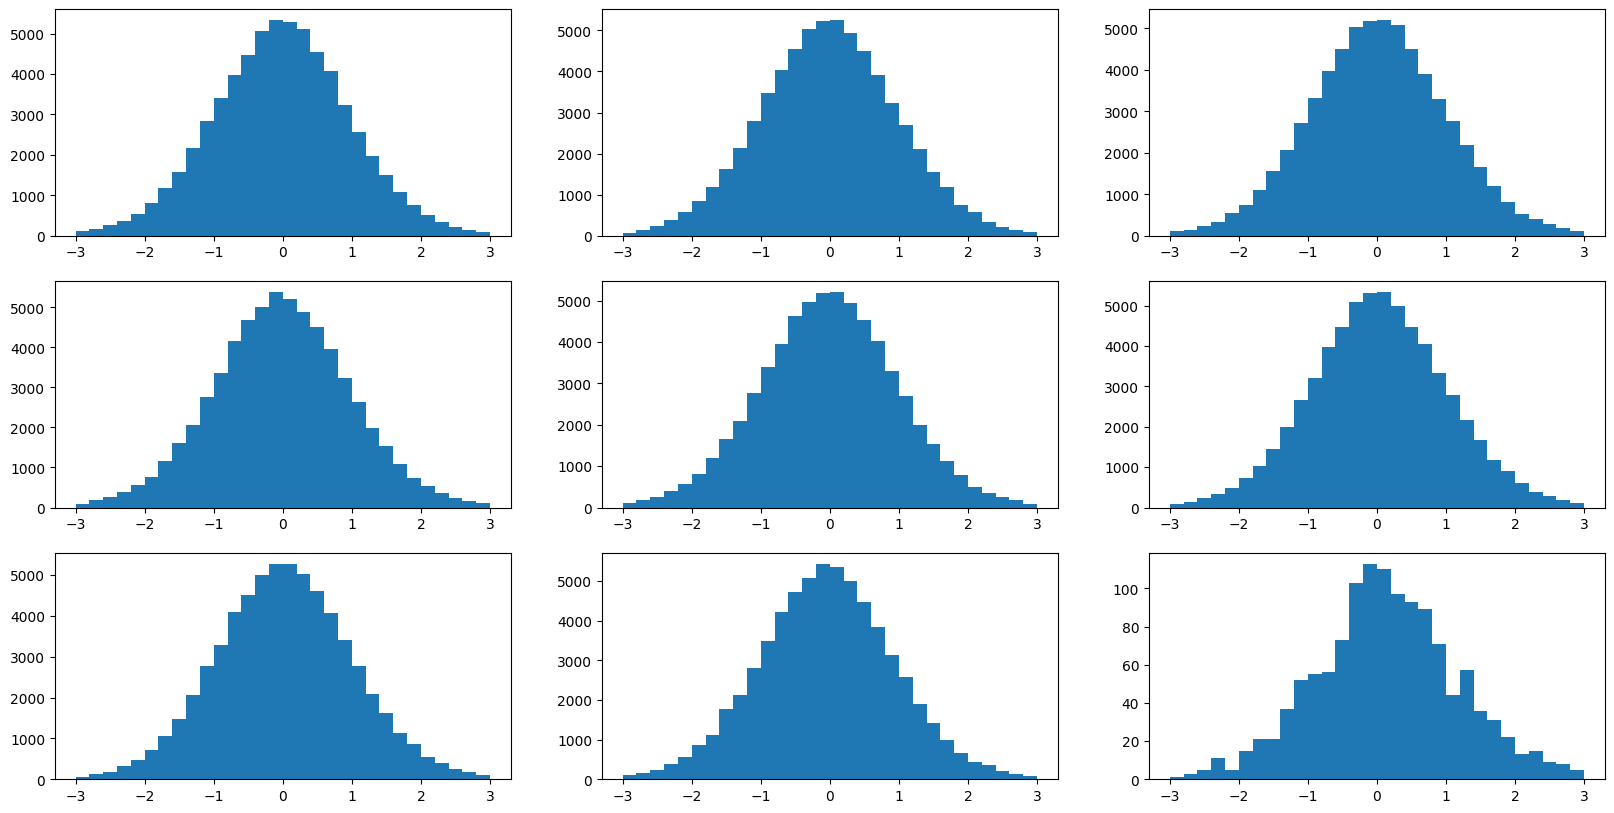

In [19]:
weights_x = init_xavier(neurons)

acts_x = {}
z= x_t.T
for (k, v) in weights_x.items():
    z = v @ z
    # z = np.maximum(0, z)
#     z = np.tanh(z)
#     z = 1/(1+np.exp(-z))
    acts_x[k] = z

plt.figure(figsize=(20,10))

for (k, v) in acts_x.items():
    print(f'La activación para la capa {k} \
tiene una media de {v.ravel().mean():.4} y una std de {v.ravel().std():.4}')

for i, (k, v) in enumerate(acts_x.items(), 1):
    plt.subplot(3, 3, i)
    plt.hist(v.ravel(), bins=30, range=[-3, 3])
    
plt.show()

La activación para la capa L1 tiene una media de 0.3823 y una std de 0.5772
La activación para la capa L2 tiene una media de 0.2713 y una std de 0.408
La activación para la capa L3 tiene una media de 0.1878 y una std de 0.2787
La activación para la capa L4 tiene una media de 0.1318 y una std de 0.1917
La activación para la capa L5 tiene una media de 0.09817 y una std de 0.1423
La activación para la capa L6 tiene una media de 0.06603 y una std de 0.09776
La activación para la capa L7 tiene una media de 0.04926 y una std de 0.07335
La activación para la capa L8 tiene una media de 0.03477 y una std de 0.05152
La activación para la capa L9 tiene una media de 0.03154 y una std de 0.03756


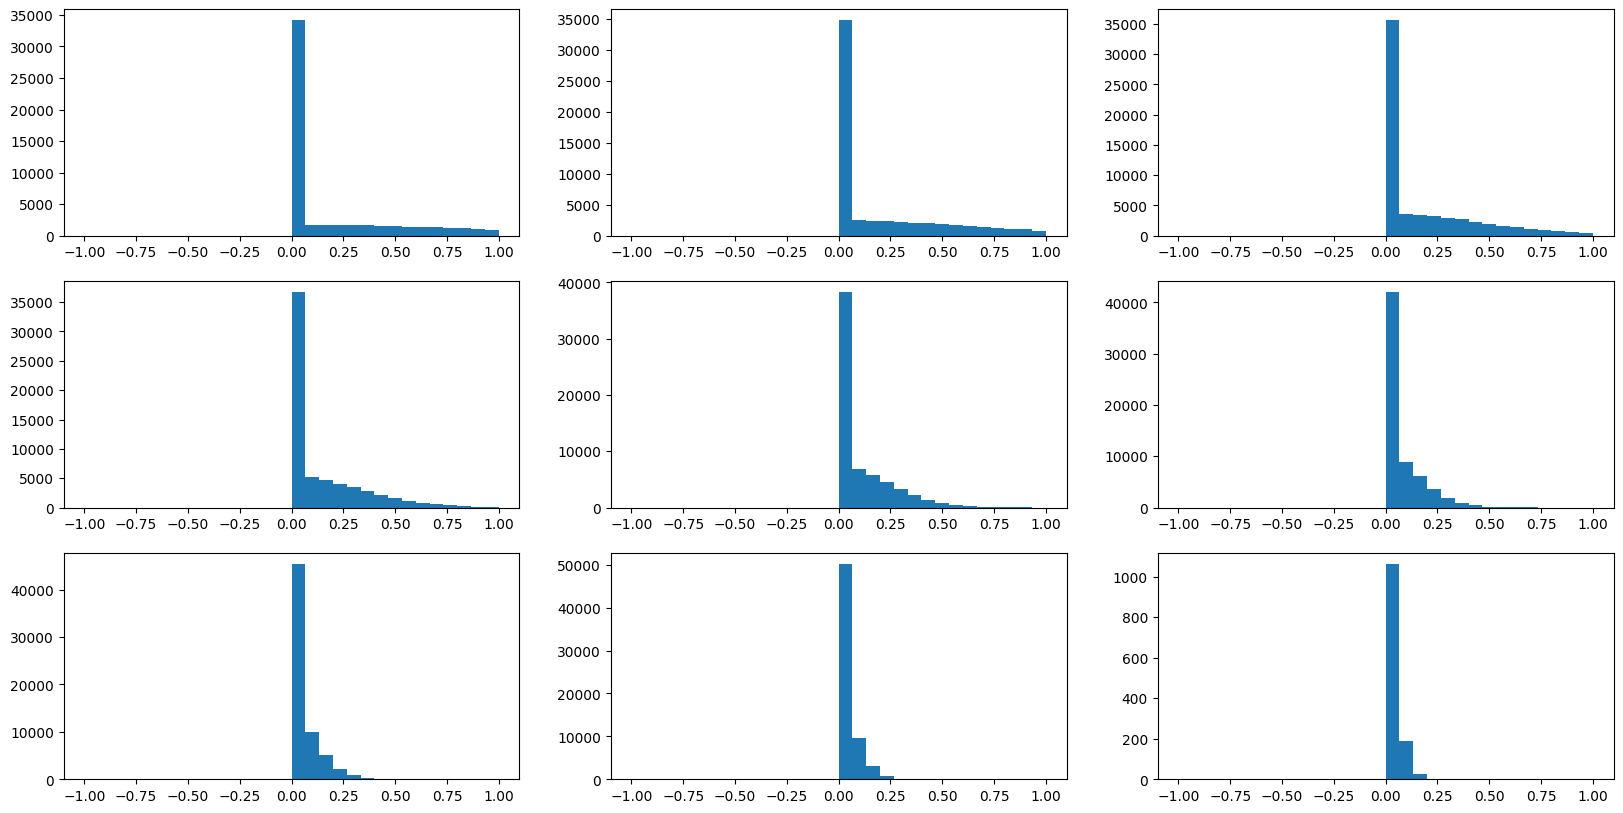

In [21]:
z= x_t.T
for (k, v) in weights_x.items():
    z = v @ z
    z = np.maximum(0, z)
#     z = np.tanh(z)
#     z = 1/(1+np.exp(-z))
    acts_x[k] = z

plt.figure(figsize=(20,10))

for (k, v) in acts_x.items():
    print(f'La activación para la capa {k} \
tiene una media de {v.ravel().mean():.4} y una std de {v.ravel().std():.4}')

for i, (k, v) in enumerate(acts_x.items(), 1):
    plt.subplot(3, 3, i)
    plt.hist(v.ravel(), bins=30, range=[-1, 1])
    
plt.show()

#### Pruebas con Kaiming

In [23]:
weights_k = init_kaiming(neurons)

acts_k = {}
z= x_t.T
for (k, v) in weights_k.items():
    z = v @ z
    z = np.maximum(0, z) 
    acts_k[k] = z

La activación para la capa L1 tiene una media de 0.5567 y una std de 0.8367
La activación para la capa L2 tiene una media de 0.5314 y una std de 0.7955
La activación para la capa L3 tiene una media de 0.4886 y una std de 0.7565
La activación para la capa L4 tiene una media de 0.503 y una std de 0.7537
La activación para la capa L5 tiene una media de 0.5029 y una std de 0.7731
La activación para la capa L6 tiene una media de 0.5672 y una std de 0.8169
La activación para la capa L7 tiene una media de 0.5714 y una std de 0.8422
La activación para la capa L8 tiene una media de 0.5671 y una std de 0.8464
La activación para la capa L9 tiene una media de 0.5891 y una std de 0.9491


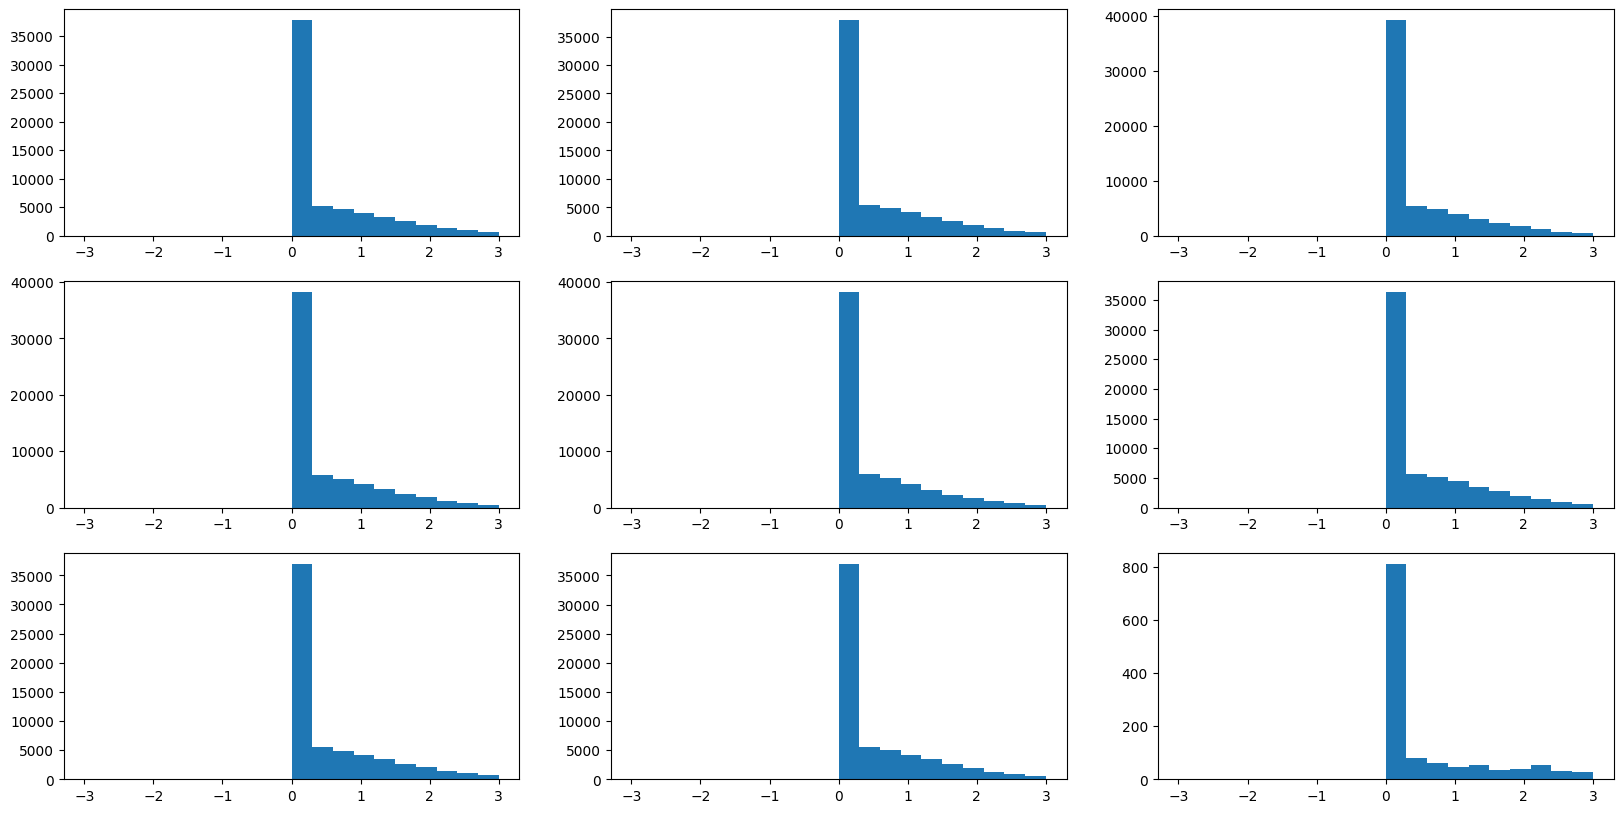

In [24]:
plt.figure(figsize=(20,10))
for (k, v) in acts_k.items():
    print(f'La activación para la capa {k} \
tiene una media de {v.ravel().mean():.4} y una std de {v.ravel().std():.4}')

for i, (k, v) in enumerate(acts_k.items(), 1):
    plt.subplot(3, 3, i)
    plt.hist(v.ravel(), bins=20, range=[-3, 3])

plt.show()